# Nonlinear Relationships

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
% matplotlib inline
import pandas as pd

In [2]:
from sklearn.datasets import load_boston
boston_data = load_boston()
df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
y = boston_data.target

In [5]:
df = pd.read_csv('housing.data', delim_whitespace=True, header=None)
df.columns = ['CRIM', 'ZN' , 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
              'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

## Brief Introduction to Decision Tree

In [6]:
from sklearn.tree import DecisionTreeRegressor

In [7]:
X = df[['LSTAT']].values

In [8]:
tree = DecisionTreeRegressor(max_depth=5)

In [9]:
tree.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [10]:
sort_idx = X.flatten().argsort()

Text(0,0.5,'MEDV')

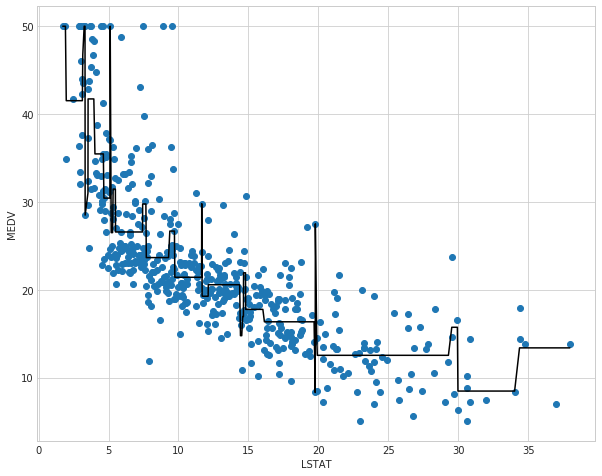

In [11]:
plt.figure(figsize=(10,8))
plt.scatter(X[sort_idx], y[sort_idx])
plt.plot(X[sort_idx], tree.predict(X[sort_idx]), color='k')

plt.xlabel('LSTAT')
plt.ylabel('MEDV')

Using `max_depth` of 5 led to overfitting. Let's try 2 instead.

Text(0,0.5,'MEDV')

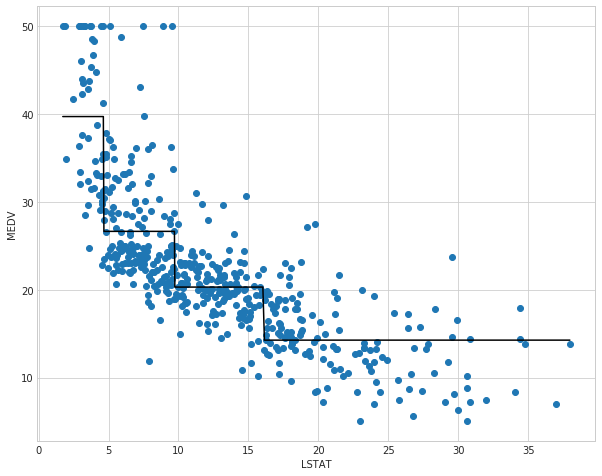

In [12]:
tree = DecisionTreeRegressor(max_depth=2)
tree.fit(X,y)
sort_idx = X.flatten().argsort()
plt.figure(figsize=(10,8))
plt.scatter(X[sort_idx], y[sort_idx])
plt.plot(X[sort_idx], tree.predict(X[sort_idx]), color='k')

plt.xlabel('LSTAT')
plt.ylabel('MEDV')

# Breif Introduction to Random Forest

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
X = df.values
#y = df['MEDV'].values

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [16]:
from sklearn.ensemble import RandomForestRegressor

In [17]:
forest = RandomForestRegressor(n_estimators=500, criterion='mse', random_state=42, n_jobs=-1)

In [18]:
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [19]:
y_train_pred = forest.predict(X_train)

In [20]:
y_test_pred = forest.predict(X_test)

In [21]:
print("MSE train: {0:.4f}, test: {1:.4f}".\
      format(mean_squared_error(y_train, y_train_pred), 
             mean_squared_error(y_test, y_test_pred)))

MSE train: 0.0091, test: 0.0228


In [22]:
print("R2 train: {0:.4f}, test: {1:.4f}".\
     format(r2_score(y_train, y_train_pred),
           r2_score(y_test, y_test_pred)))

R2 train: 0.9999, test: 0.9997


# Brief Introduction to AdaBoost

In [23]:
from sklearn.ensemble import AdaBoostRegressor

In [24]:
ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                        n_estimators=500, random_state=42)

In [25]:
ada.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=500,
         random_state=42)

In [26]:
y_train_pred = ada.predict(X_train)

In [27]:
y_test_pred = ada.predict(X_test)

In [28]:
print("MSE train: {0:.4f}, test: {1:.4f}".\
      format(mean_squared_error(y_train, y_train_pred), 
             mean_squared_error(y_test, y_test_pred)))

MSE train: 0.0356, test: 0.0638


In [29]:
print("R2 train: {0:.4f}, test: {1:.4f}".\
     format(r2_score(y_train, y_train_pred),
           r2_score(y_test, y_test_pred)))

R2 train: 0.9996, test: 0.9991


# Revisiting Feature Importance

13 features.

Are they all equally important?

Which features are more important?

Can scikit-learn help us with this?

## According to AdaBoost

In [30]:
ada.feature_importances_

array([2.25768075e-04, 0.00000000e+00, 1.29798738e-05, 1.73611242e-06,
       9.10804610e-07, 3.48758368e-05, 2.07691512e-05, 1.93291928e-05,
       2.70457186e-05, 4.15352703e-05, 1.65274444e-05, 3.36241219e-05,
       3.28141007e-06, 9.99561617e-01])

In [31]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [32]:
result = pd.DataFrame(ada.feature_importances_, df.columns)
result.columns = ['feature']

In [33]:
result.sort_values(by='feature', ascending=False)

,feature
MEDV,9.995616e-01
CRIM,2.257681e-04
TAX,4.153527e-05
RM,3.487584e-05
B,3.362412e-05
RAD,2.704572e-05
AGE,2.076915e-05
DIS,1.932919e-05
PTRATIO,1.652744e-05
INDUS,1.297987e-05


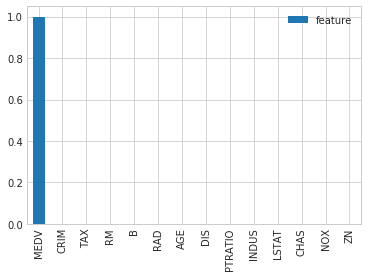

In [34]:
result.sort_values(by='feature', ascending=False).plot(kind='bar');

# According to Random Forest

In [35]:
forest.feature_importances_

array([1.50097433e-04, 1.95928664e-05, 4.38118580e-05, 1.21806015e-05,
       3.97358038e-05, 7.17494703e-05, 8.53387965e-05, 1.13272746e-04,
       4.30783218e-05, 5.94555840e-05, 4.01720934e-05, 1.02538015e-04,
       6.82515380e-05, 9.99150725e-01])

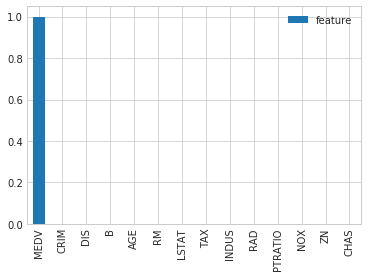

In [36]:
result = pd.DataFrame(forest.feature_importances_, df.columns)
result.columns = ['feature']
result.sort_values(by='feature', ascending=False).plot(kind='bar');

# Exercise

In [37]:
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X_train, y_train)

y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

In [38]:
print("MSE train: {0:.4f}, test: {1:.4f}".\
      format(mean_squared_error(y_train, y_train_pred), 
             mean_squared_error(y_test, y_test_pred)))

MSE train: 2.0650, test: 2.1483


In [39]:
print("R^2 train: {0:.4f}, test: {1:.4f}".\
      format(r2_score(y_train, y_train_pred),
             r2_score(y_test, y_test_pred)))

R^2 train: 0.9765, test: 0.9712


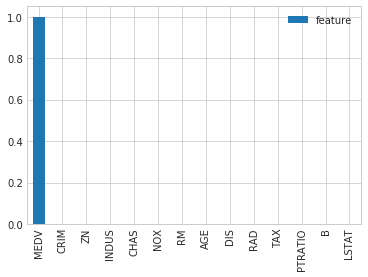

In [40]:
result = pd.DataFrame(tree.feature_importances_, df.columns)
result.columns = ['feature']
result.sort_values(by='feature', ascending=False).plot(kind='bar');

# Data Pre-Processing

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [42]:
from sklearn.datasets import load_boston
boston_data = load_boston()
df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [43]:
X = df[['LSTAT']].values
y = boston_data.target

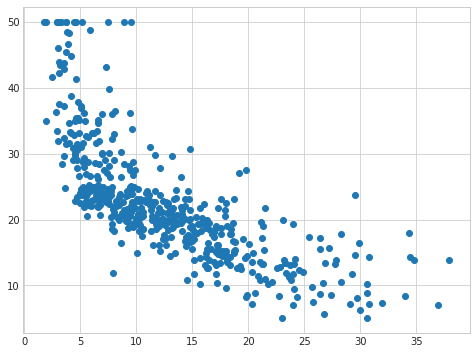

In [44]:
plt.figure(figsize=(8,6))
plt.scatter(X, y);

## Without Pre-processing

In [45]:
alpha = 0.0
w_ = np.zeros(1 + X.shape[1])
cost_ = []
n_ = 100

for i in range(n_):
    y_pred = np.dot(X, w_[1:]) + w_[0]
    errors = (y - y_pred)
    
    w_[1:] += alpha * X.T.dot(errors)
    w_[0] += alpha * errors.sum()
    
    cost = (errors**2).sum() / 2.0
    cost_.append(cost)

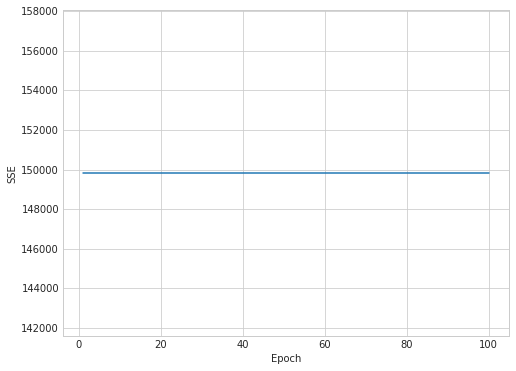

In [46]:
plt.figure(figsize=(8,6))
plt.plot(range(1, n_ + 1), cost_);
plt.ylabel('SSE');
plt.xlabel('Epoch');

# With Pre-processing

In [47]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y.reshape(-1,1)).flatten()

In [48]:
alpha = 0.0001
w_ = np.zeros(1 + X_std.shape[1])
cost_ = []
n_ = 100

for i in range(n_):
    y_pred = np.dot(X_std, w_[1:]) + w_[0]
    errors = (y_std - y_pred)
    
    w_[1:] += alpha * X_std.T.dot(errors)
    w_[0] += alpha * errors.sum()
    
    cost = (errors**2).sum() / 2.0
    cost_.append(cost)

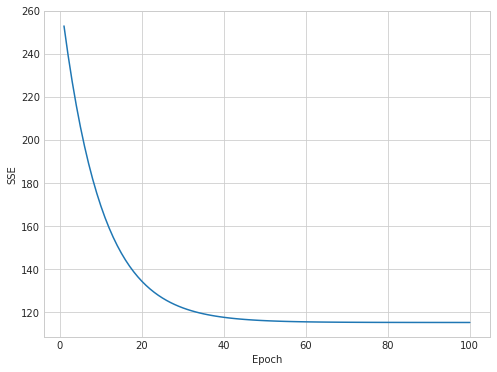

In [49]:
plt.figure(figsize=(8,6))
plt.plot(range(1, n_ + 1), cost_);
plt.ylabel('SSE');
plt.xlabel('Epoch');

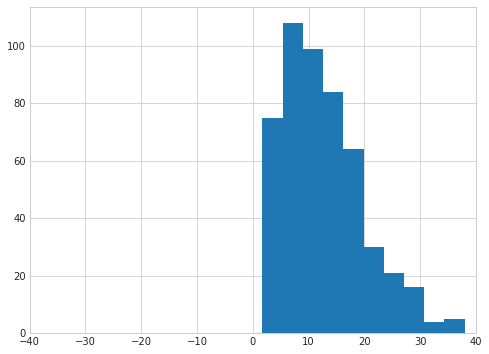

In [50]:
plt.figure(figsize=(8,6))
plt.hist(X);
plt.xlim(-40, 40);

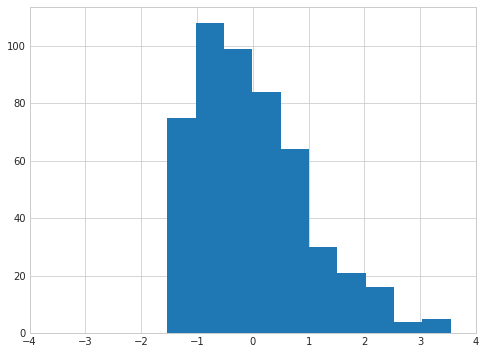

In [51]:
plt.figure(figsize=(8,6))
plt.hist(X_std);
plt.xlim(-4, 4);

# Data Pre-processing

* Standardization / Mean Removal

* Min-Max or Scaling Features to a Range

* Normalization

* Binarization

Assumptions:

* Implicit/explicit assumption of machine learning algorithms: The features follow a normal distribution.
* Most method are based on linear assumptions
* Most machine learning requires the data to be standard normally distributed. Gaussian with zero mean and unit variance.

[scikit-learn:](http://scikit-learn.org/stable/modules/preprocessing.html) In practice we often ignore the shape of the distribution and just transform the data to center it by removing the mean value of each feature, then scale it by dividing non-constant features by their standard deviation.

For instance, many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the l1 and l2 regularizers of linear models) **assume that all features are centered around zero and have variance in the same order**. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.


In [52]:
from sklearn import preprocessing

In [53]:
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])

In [54]:
X_train.mean(axis=0)

array([1.        , 0.        , 0.33333333])

# Standardization / Mean Removal / Variance Scaling

[scikit Scale](http://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling)

Mean is removed. Data is centered on zero. This is to remove bias.

Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance. "standard normal" random variable with mean 0 and standard deviation 1.

$$X'=\frac{X-\bar{X}}{\sigma}$$

In [55]:
X_scaled = preprocessing.scale(X_train)

In [56]:
X_scaled

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [57]:
X_scaled.mean(axis=0)

array([0., 0., 0.])

In [58]:
X_scaled.std(axis=0)

array([1., 1., 1.])

Keeping in mind that if you have scaled your training data, you must do likewise with your t

In [59]:
scaler = preprocessing.StandardScaler().fit(X_train)
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [60]:
scaler.mean_

array([1.        , 0.        , 0.33333333])

In [61]:
scaler.scale_

array([0.81649658, 0.81649658, 1.24721913])

In [62]:
scaler.transform(X_train)

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

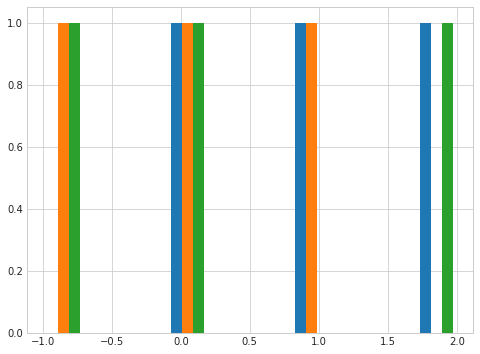

In [63]:
plt.figure(figsize=(8,6))
plt.hist(X_train);

You can now utilise the `transform` for new dataset

In [64]:
X_test = [[-1., 1., 0.]]

In [65]:
scaler.transform(X_test)

array([[-2.44948974,  1.22474487, -0.26726124]])

# Min-Max or Scaling Features to a Range

Scaling features to lie between a given minimum and maximum value, often between zero and one, or so that the maximum absolute value of each feature is scaled to unit size.

The motivation to use this scaling include robustness to very small standard deviations of features and preserving zero entries in sparse data.

## MinMaxScaler

Scale a data to the `[0, 1]` range:

In [66]:
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])

In [67]:
min_max_scaler = preprocessing.MinMaxScaler()

In [68]:
X_train_minmax = min_max_scaler.fit_transform(X_train)

In [69]:
X_train_minmax

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

In [70]:
X_test = np.array([[-3., -1.,  0.], [2., 1.5, 4.]])

In [71]:
X_test_minmax = min_max_scaler.transform(X_test)

In [72]:
X_test_minmax

array([[-1.5       ,  0.        ,  0.33333333],
       [ 1.        ,  1.25      ,  1.66666667]])

doc:

Init signature: preprocessing.MinMaxScaler(feature_range=(0, 1), copy=True)

Transforms features by scaling each feature to a given range.

This estimator scales and translates each feature individually such
that it is in the given range on the training set, i.e. between
zero and one.

The transformation is given by::

    X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
    X_scaled = X_std * (max - min) + min
    
$$X_{std}=\frac{X-X_{min}}{X_{max}-X_{min}}$$

$$X'=X_{std} (\text{max} - \text{min}) + \text{min}$$

In [73]:
preprocessing.MinMaxScaler?

## MaxAbsScaler

Works in a very similar fashion, but scales in a way that the training data lies within the range `[-1, 1]` by dividing through the largest maximum value in each feature. It is meant for data that is already centered at zero or sparse data.

In [74]:
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])

In [75]:
max_abs_scaler = preprocessing.MaxAbsScaler()
X_train_maxabs = max_abs_scaler.fit_transform(X_train)
X_train_maxabs 

array([[ 0.5, -1. ,  1. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  1. , -0.5]])

In [76]:
X_test = np.array([[ -1., -0.5,  2.], [0., 0.5, -0.6]])
X_test_maxabs = max_abs_scaler.transform(X_test)
X_test_maxabs  

array([[-0.5, -0.5,  1. ],
       [ 0. ,  0.5, -0.3]])

## Scaling sparse data

Centering sparse data would destroy the sparseness structure in the data, and thus rarely is a sensible thing to do. 

However, it can make sense to scale sparse inputs, especially if features are on different scales.

`MaxAbsScaler` and `maxabs_scale` were specifically designed for scaling sparse data

[Compare the effect of different scalers on data with outliers](http://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py)

## Scaling vs Whitening

It is sometimes not enough to center and scale the features independently, since a downstream model can further make some assumption on the linear independence of the features.

To address this issue you can use `sklearn.decomposition.PCA` or `sklearn.decomposition.RandomizedPCA` with `whiten=True` to further remove the linear correlation across features.

# Normalization

Normalization is the process of scaling individual samples to have unit norm. 

This process can be useful if you plan to use a quadratic form such as the dot-product or any other kernel to quantify the similarity of any pair of samples.

$$X'=\frac{X-X_{mean}}{X_{max}-X_{min}}$$

This assumption is the base of the Vector Space Model often used in text classification and clustering contexts.

There are two types of Normalization

  1. **L1 normalization**, Least Absolute Deviations
Ensure the sum of absolute values is 1 in each row. 

  2. **L2 normalization**, Least squares, 
Ensure that the sum of squares is 1.

In [77]:
X = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]
X_normalized = preprocessing.normalize(X, norm='l2')

X_normalized 

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

Alternatively

The `preprocessing` module further provides a utility class `Normalizer` that implements the same operation using the `Transformer` API.

In [78]:
normalizer = preprocessing.Normalizer().fit(X)  # fit does nothing
normalizer

Normalizer(copy=True, norm='l2')

In [79]:
normalizer.transform(X)

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

In [80]:
normalizer.transform([[-1.,1.,0.]])

array([[-0.70710678,  0.70710678,  0.        ]])

# Binarization

$$f(x)={0,1}$$

Feature binarization is the process of thresholding numerical features to get boolean values. This can be useful for downstream probabilistic estimators that make assumption that the input data is distributed according to a multi-variate Bernoulli distribution


It is also common among the text processing community to use binary feature values (probably to simplify the probabilistic reasoning) even if normalized counts (a.k.a. term frequencies) or TF-IDF valued features often perform slightly better in practice.

In [81]:
X = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]

binarizer = preprocessing.Binarizer().fit(X)  # fit does nothing
binarizer

Binarizer(copy=True, threshold=0.0)

In [82]:
binarizer.transform(X)

array([[1., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

Modifying the threshold

In [83]:
binarizer = preprocessing.Binarizer(threshold=1.1)

In [84]:
binarizer.transform(X)

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 0.]])

# Encoding categorical features

[LabelEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

In [85]:
source = ['australia', 'singapore', 'new zealand', 'hong kong']

In [86]:
label_enc = preprocessing.LabelEncoder()
src = label_enc.fit_transform(source)

In [87]:
print('country to code mapping:\n')
for k,v in enumerate(label_enc.classes_):
    print(v, '\t', k)

country to code mapping:

australia 	 0
hong kong 	 1
new zealand 	 2
singapore 	 3


In [88]:
test_data = ['hong kong', 'singapore', 'australia', 'new zealand']

In [90]:
result = encoder.transforms(test_data)

NameError: name 'encoder' is not defined

## One Hot / One-of-K Encoding

* Useful for dealing with sparse matrix
* uses [one-of-k scheme](http://code-factor.blogspot.sg/2012/10/one-hotone-of-k-data-encoder-for.html)


The process of turning a series of categorical responses into a set of binary result (0 or 1)

[One Hot Encoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder)

In [91]:
source

['australia', 'singapore', 'new zealand', 'hong kong']

In [92]:
src

array([0, 3, 2, 1])

In [93]:
from sklearn.preprocessing import OneHotEncoder

In [94]:
one_hot_enc = OneHotEncoder(sparse=False)
src = src.reshape(len(src),1)
one_hot = one_hot_enc.fit_transform(src)
print(one_hot)

[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]


In [95]:
invert_res = label_enc.inverse_transform([np.argmax(one_hot[0,:])])
print(invert_res)

['australia']


/home/hvyd/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [96]:
invert_res = label_enc.inverse_transform([np.argmax(one_hot[3,:])])
print(invert_res)

['hong kong']


/home/hvyd/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# References

* [Section - Should I normalize/standardize/rescale the data?](http://www.faqs.org/faqs/ai-faq/neural-nets/part2/section-16.html)
* [Colleen Farrelly - Machine Learning by Analogy](https://www.slideshare.net/ColleenFarrelly/machine-learning-by-analogy-59094152)
* [Lior Rokach - Introduction to Machine Learning](https://www.slideshare.net/liorrokach/introduction-to-machine-learning-13809045)
* [Ritchie Ng](http://www.ritchieng.com/machinelearning-one-hot-encoding/)

# Variance Bias Trade off

Every estimator has its advantages and drawbacks. Its generalization error can be decomposed in terms of bias, variance and noise. The **bias** of an estimator is its average error for different training sets. The **variance** of an estimator indicates how sensitive it is to varying training sets. Noise is a property of the data.

Bias and variance are inherent properties of estimators and we usually have to select learning algorithms and hyperparameters so that both bias and variance are as low as possible. Another way to reduce the variance of a model is to use more training data. However, you should only collect more training data if the true function is too complex to be approximated by an estimator with a lower variance.

Automatically created module for IPython interactive environment


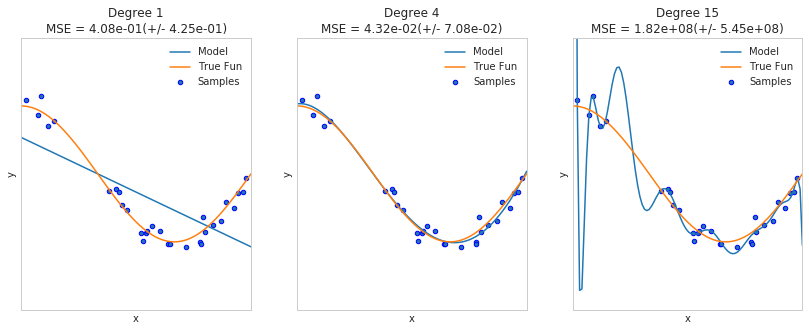

In [97]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1,4,15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples)* 0.1

plt.figure(figsize=(14,5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                            include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)
    
    scores = cross_val_score(pipeline, X[:, np.newaxis],y,
                            scoring="neg_mean_squared_error", cv=10)
    
    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True Fun")
    plt.scatter(X,y, edgecolor='b', s=20, label='Samples')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim((0,1))
    plt.ylim((-2,2))
    plt.legend(loc='best')
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))
    
plt.show()


Importing usual library

In [98]:
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn 
seaborn.set_style('whitegrid')


# Validation Curve

* For identification of over- and under-fitting
* Plotting training and validation scores vs model parameters


## Validation Curve for Ridge Regression

In [100]:
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_iris
from sklearn.linear_model import Ridge

np.random.seed(0)
iris = load_iris()
X,y = iris.data, iris.target
indices = np.arange(y.shape[0])
np.random.shuffle(indices)
X,y = X[indices], y[indices]
param_name = 'alpha'
param_range = np.logspace(-5,2,10)

train_scores, valid_scores = validation_curve(Ridge(),
                                             X,
                                             y,
                                             param_name,
                                             param_range,
                                             scoring='r2')
print(train_scores)
print(valid_scores)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(valid_scores, axis=1)
test_std = np.std(valid_scores, axis=1)


[[0.94141575 0.92944161 0.92267644]
 [0.94141575 0.92944161 0.92267644]
 [0.94141575 0.92944161 0.92267644]
 [0.94141574 0.92944161 0.92267643]
 [0.94141555 0.92944147 0.92267627]
 [0.94140905 0.92943672 0.92267062]
 [0.94122796 0.92929956 0.92250918]
 [0.93864928 0.92720953 0.9201652 ]
 [0.92516976 0.91623535 0.90866735]
 [0.87947046 0.87281594 0.86003406]]
[[0.90335828 0.92525982 0.94159335]
 [0.90335841 0.92525969 0.94159334]
 [0.90335923 0.92525892 0.94159327]
 [0.90336411 0.92525427 0.94159282]
 [0.90339309 0.9252264  0.94158999]
 [0.9035563  0.92505845 0.94156839]
 [0.90425122 0.92403578 0.94131162]
 [0.90492661 0.91834258 0.93850378]
 [0.89750235 0.89783134 0.92867312]
 [0.85024272 0.8334692  0.90023046]]
